<a href="https://colab.research.google.com/github/anisaafn/2025_Visi-Komputer_TI-2B/blob/master/Jobsheet_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Jobsheet 2: Klasifikasi Gambar


## **Praktikum D1 – Memulai Klasifikasi Gambar dengan Dataset Sederhana**


Bayangkan Anda baru pertama kali mengenalkan komputer pada dunia visual. Sebelum komputer bisa mengenali gambar kompleks seperti mobil atau wajah manusia, mari kita ajarkan dulu konsep sederhana: mengenali angka tulisan tangan. Dataset MNIST yang berisi digit 0–9 adalah titik awal yang bagus.

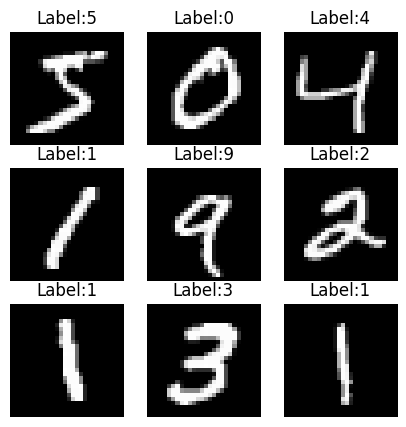

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

#load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#tampilkan contoh
plt.figure (figsize=(5, 5))
for i in range (9):
  plt.subplot(3, 3, i+1)
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  plt.title(f"Label:{y_train[i]}")
  plt.axis('off')

plt.show()

**Tugas kecil:** Cobalah ganti range(9) dengan range(25) untuk menampilkan lebih banyak contoh. Apa yang Anda perhatikan dari bentuk tulisan tangan manusia?

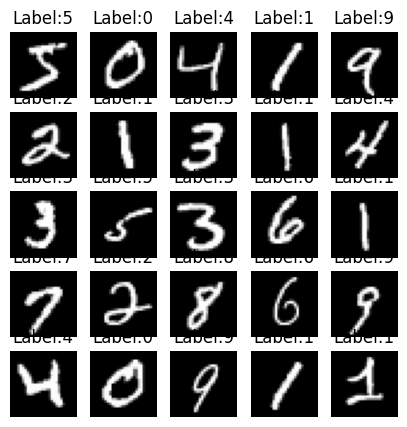

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

#load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#tampilkan contoh
plt.figure (figsize=(5, 5))
for i in range (25):
  plt.subplot(5, 5, i+1)
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  plt.title(f"Label:{y_train[i]}")
  plt.axis('off')

plt.show()

## **Praktikum D2 Klasifikasi Gambar dengan Model Machine Learning Tradisional**

Sebelum CNN populer, pendekatan klasik digunakan. Mari kita coba Support Vector Machine (SVM). Dataset yang kita pakai tetap MNIST, tapi gambar harus diubah menjadi vektor 1D.
Langkah di Google Colab:
1.	Flatten setiap gambar 28x28 menjadi vektor 784.
2.	Gunakan sklearn.svm.SVC untuk melatih model sederhana.
3.	Uji model pada data test dan lihat akurasinya.


In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

#SVM
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])

#prediksi
y_pred = clf.predict(x_test_flat)

#Akurasi
print("Akurasi:", accuracy_score (y_test, y_pred))

Akurasi: 0.9101


**Tugas kecil:** Ubah kernel dari linear menjadi rbf. Bagaimana pengaruhnya terhadap
akurasi?

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

#SVM
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])

#prediksi
y_pred = clf.predict(x_test_flat)

#Akurasi
print("Akurasi:", accuracy_score (y_test, y_pred))

Akurasi: 0.9513


## **Praktikum D3 – Membangun CNN Sederhana**

Sekarang saatnya mencoba Convolutional Neural Network. CNN akan belajar mengenali pola dari gambar MNIST secara otomatis.
Langkah di Google Colab:
1.	Ubah data menjadi bentuk [samples, height, width, channels].
2.	Bangun CNN sederhana dengan Conv2D, MaxPooling2D, Flatten, dan Dense.
3.	Latih model dan amati hasilnya.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 32s 18ms/step - accuracy: 0.8964 - loss: 0.3553 - val_accuracy: 0.9815 - val_loss: 0.0675
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 16ms/step - accuracy: 0.9814 - loss: 0.0616 - val_accuracy: 0.9870 - val_loss: 0.0516
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9877 - loss: 0.0390 - val_accuracy: 0.9848 - val_loss: 0.0532
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.9922 - loss: 0.0248 - val_accuracy: 0.9890 - val_loss: 0.0438
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.9938 - loss: 0.0206 - val_accuracy: 0.9857 - val_loss: 0.0561


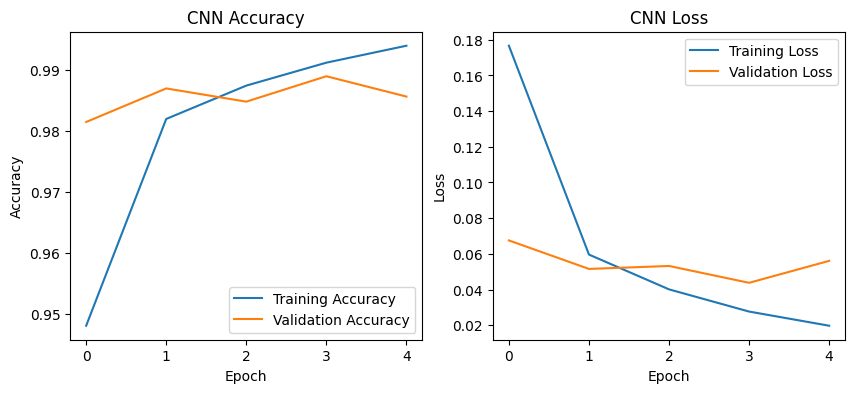

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ==== Plot History =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Tugas kecil:** Tambahkan satu lapisan Conv2D lagi sebelum Flatten. Apakah akurasinya meningkat?

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 43s 25ms/step - accuracy: 0.8887 - loss: 0.3584 - val_accuracy: 0.9845 - val_loss: 0.0547
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 24ms/step - accuracy: 0.9844 - loss: 0.0536 - val_accuracy: 0.9878 - val_loss: 0.0398
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.9894 - loss: 0.0335 - val_accuracy: 0.9872 - val_loss: 0.0441
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 24ms/step - accuracy: 0.9914 - loss: 0.0265 - val_accuracy: 0.9905 - val_loss: 0.0347
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.9941 - loss: 0.0180 - val_accuracy: 0.9918 - val_loss: 0.0377


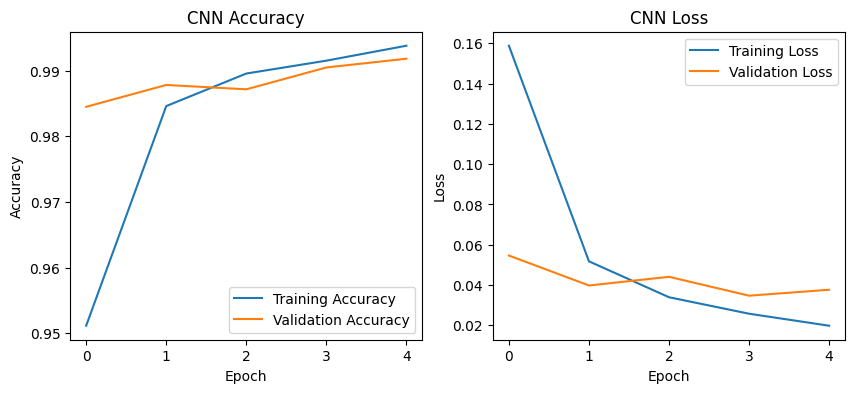

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ==== Plot History =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## **Praktikum D4 Eksperimen dengan Dataset Lebih Kompleks (CIFAR-10)**

MNIST mudah. Sekarang mari coba CIFAR-10, yang berisi gambar berwarna (mobil, pesawat, anjing, kucing, dll). Ini membuat model CNN bekerja lebih keras.


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 55ms/step - accuracy: 0.3640 - loss: 1.7378 - val_accuracy: 0.5674 - val_loss: 1.2346
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 57s 40ms/step - accuracy: 0.5876 - loss: 1.1709 - val_accuracy: 0.6070 - val_loss: 1.1065
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 84s 42ms/step - accuracy: 0.6481 - loss: 1.0115 - val_accuracy: 0.6500 - val_loss: 1.0154
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.6806 - loss: 0.9203 - val_accuracy: 0.6878 - val_loss: 0.9143
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 41ms/step - accuracy: 0.7084 - loss: 0.8334 - val_accuracy: 0.6824 - val_loss: 0.9210
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 57s 40ms/step - accuracy: 0.7281 - loss: 0.7760 - val_accuracy: 0.6944 - val_loss: 0.8869
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 41ms/step - accuracy: 0.7503 - loss: 0.7214 - val_accuracy: 0.7012 - val_loss: 0.8816
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 85s 44ms/step - accuracy: 0.7661 -

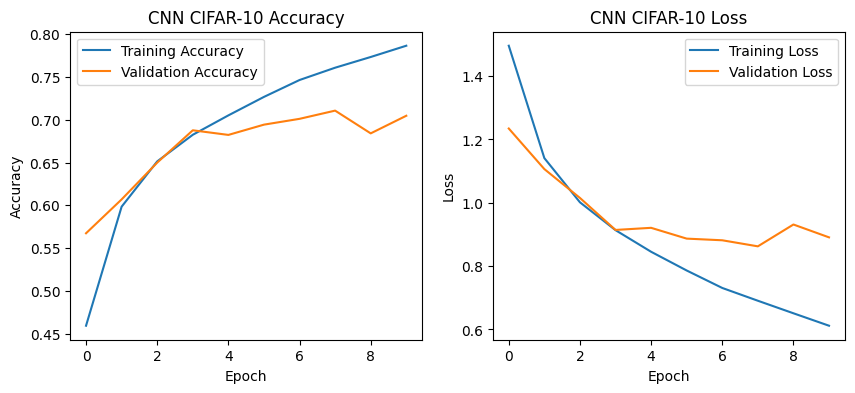

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Bangun model CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10, 4))

# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Tugas kecil:** Coba tambahkan Dropout(0.5) sebelum lapisan Dense terakhir. Apa pengaruhnya pada overfitting?

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 53s 36ms/step - accuracy: 0.2697 - loss: 1.9640 - val_accuracy: 0.5062 - val_loss: 1.3958
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.4397 - loss: 1.5305 - val_accuracy: 0.5502 - val_loss: 1.2477
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 51s 36ms/step - accuracy: 0.4904 - loss: 1.3937 - val_accuracy: 0.6038 - val_loss: 1.1401
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.5237 - loss: 1.3092 - val_accuracy: 0.5968 - val_loss: 1.1357
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.5462 - loss: 1.2550 - val_accuracy: 0.6366 - val_loss: 1.0532
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 52s 37ms/step - accuracy: 0.5704 - loss: 1.1855 - val_accuracy: 0.6578 - val_loss: 1.0011
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.5908 - loss: 1.1404 - val_accuracy: 0.6570 - val_loss: 0.9991
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 52s 37ms/step - accuracy: 0.6012 -

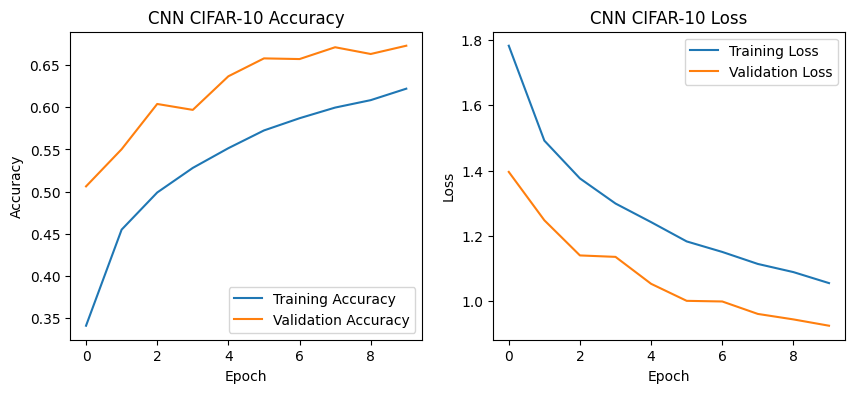

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Bangun model CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),   # <<< Tambahkan Dropout di sini
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10, 4))

# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## **Praktikum D5: Transfer Learning dengan Model Pra-Latih**

Bagaimana jika kita gunakan “otak” yang sudah cerdas? Misalnya VGG16 atau ResNet50 yang sudah dilatih di ImageNet. Kita tinggal memanfaatkannya.


Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 642s 455ms/step - accuracy: 0.4571 - loss: 1.5574 - val_accuracy: 0.5826 - val_loss: 1.2181
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 622s 442ms/step - accuracy: 0.5790 - loss: 1.2123 - val_accuracy: 0.5852 - val_loss: 1.1771
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 635s 451ms/step - accuracy: 0.6007 - loss: 1.1512 - val_accuracy: 0.5922 - val_loss: 1.1616
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 686s 454ms/step - accuracy: 0.6144 - loss: 1.1066 - val_accuracy: 0.6034 - val_loss: 1.1305
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 687s 457ms/step - accuracy: 0.6299 - loss: 1.0674 - val_accuracy: 0.6018 - val_loss: 1.1224


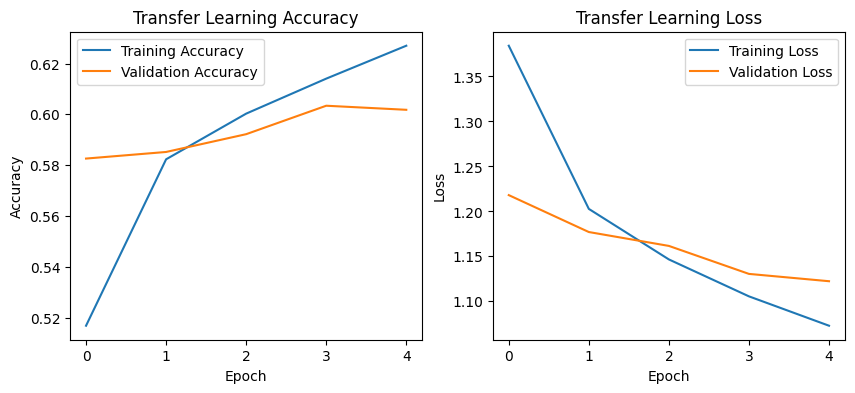

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt

# Load base model VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False  # Freeze layer VGG16

# Bangun model transfer learning
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10, 4))

# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Tugas kecil:** Coba aktifkan 1–2 lapisan terakhir dari base_model (fine-tuning). Bagaimana akurasinya berubah?

0 block4_pool trainable: False
1 block5_conv1 trainable: False
2 block5_conv2 trainable: False
3 block5_conv3 trainable: True
4 block5_pool trainable: True
Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 827s 558ms/step - accuracy: 0.3490 - loss: 1.9054 - val_accuracy: 0.5658 - val_loss: 1.2922
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 742s 515ms/step - accuracy: 0.5714 - loss: 1.2706 - val_accuracy: 0.6042 - val_loss: 1.1592
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 737s 512ms/step - accuracy: 0.6104 - loss: 1.1453 - val_accuracy: 0.6248 - val_loss: 1.0941
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 738s 509ms/step - accuracy: 0.6299 - loss: 1.0840 - val_accuracy: 0.6402 - val_loss: 1.0556
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 745s 512ms/step - accuracy: 0.6478 - loss: 1.0329 - val_accuracy: 0.6458 - val_loss: 1.0263


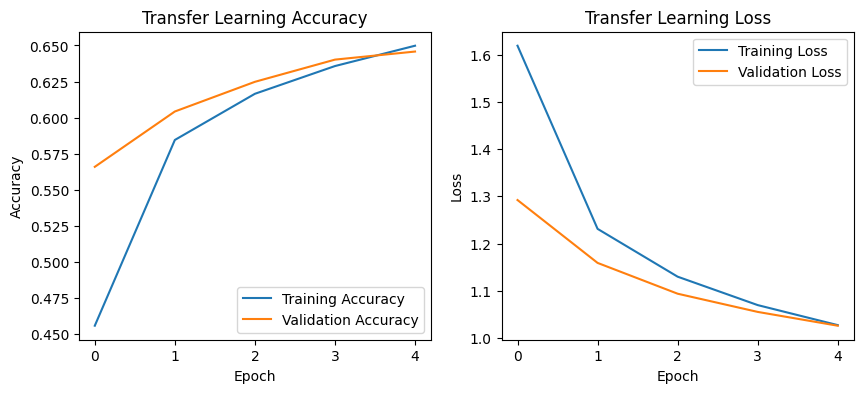

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt

# Load base model VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# --- Fine-tuning: aktifkan 1–2 layer terakhir ---
# Bekukan semua layer terlebih dahulu
for layer in base_model.layers:
    layer.trainable = False

# Aktifkan 2 layer terakhir (misal: conv5_block3_conv2 & conv5_block3_conv3)
for layer in base_model.layers[-2:]:
    layer.trainable = True

# Cek status trainable (opsional)
for i, layer in enumerate(base_model.layers[-5:]):  # lihat 5 terakhir
    print(i, layer.name, "trainable:", layer.trainable)

# Bangun model transfer learning
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Gunakan learning rate lebih kecil saat fine-tuning agar tidak merusak bobot pretrained
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10, 4))

# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## **Praktikum D6: Evaluasi dengan Confusion Matrix dan Metrik Lain**

Model sudah dilatih, tapi bagaimana cara mengevaluasi secara lebih detail? Akurasi saja tidak cukup. Mari tampilkan confusion matrix dan hitung precision, recall, serta F1-score.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi
y_pred = model.predict(x_test).argmax(axis=1)

# Laporan klasifikasi
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


198/313 ━━━━━━━━━━━━━━━━━━━━ 50s 435ms/step

**Tugas kecil:** Dari confusion matrix, identifikasi kelas apa yang paling sering salah diklasifikasikan. Menurut Anda, mengapa hal itu bisa terjadi?

**Jawaban:**
